jupyter nbconvert --to slides --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2"

In [13]:
import pods
import mlai
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

#### MLAI Week 4: Basis Functions

### Neil D. Lawrence

### 20th October 2015

### Review
- Last time: explored least squares for univariate and multivariate regression.
- Introduced matrices, linear algebra and derivatives.
- This time: introduce *basis functions* for non-linear regression models.

### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

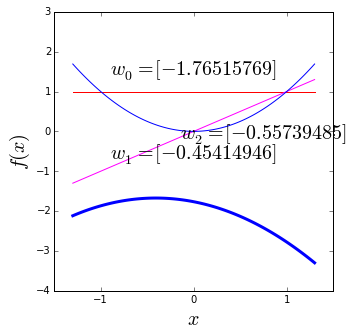

In [14]:
f, ax = plt.subplots(figsize=(5, 5))

loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']
mlai.plot_basis(mlai.polynomial, x_min=-1.3, x_max=1.3, fig=f, ax=ax, loc=loc, text=text)    


### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/polynomial_basis1.svg", width=60%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\mathbf{\phi} = [1, x, x^2]$$
    
<center><img src="./diagrams/polynomial_basis2.svg", width=60%></center>

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
     $$\mathbf{\phi} = [1, x, x^2]$$
   
<center><img src="./diagrams/polynomial_basis3.svg", width=60%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_0} + {\color{\magentaColor}w_1x} + {\color{\blueColor}w_2 x^2}$$

<center><img src="./diagrams/polynomial_function1.svg", width=60%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/polynomial_function2.svg", width=60%></center>

### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$$

<center><img src="./diagrams/polynomial_function3.svg", width=60%></center>

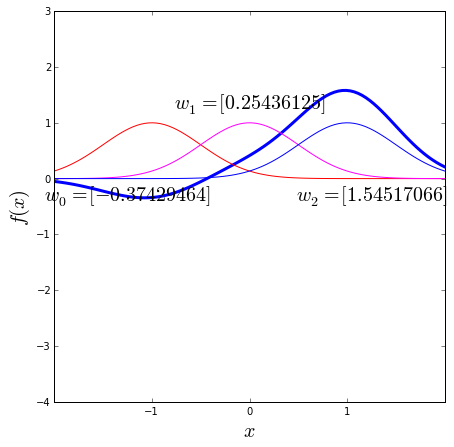

In [15]:
f, ax = plt.subplots(figsize=(7, 7))

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = ['$\phi_1(x) = e^{-(x + 1)^2}$',
        '$\phi_2(x) = e^{-2x^2}$', 
        '$\phi_3(x) = e^{-2(x-1)^2}$']
plot_basis(mlai.radial, x_min=-2, x_max=2, fig=f, ax=ax, loc=loc, text=text)    


### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radial_basis1.svg", width=60%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radial_basis2.svg", width=60%></center>

### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)$$

<center><img src="./diagrams/radial_basis3.svg", width=60%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radial_function1.svg", width=60%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radial_function2.svg", width=60%></center>

### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$$

<center><img src="./diagrams/radial_function3.svg", width=60%></center>

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}$$


## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{\phi}_i$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\mathbf{\phi}_i\\ &+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\mathbf{w} +\text{const}.\end{align}$$
 

 ### Expand the Brackets
 $$ \begin{align} E(\mathbf{w}, \sigma^2) = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
  \mathbf{w}^\top\sum_{i=1}^{n}\mathbf{\phi}_i y_i\\ & +\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum
    _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w} +\text{const}.\end{align}$$

### Multivariate Derivatives Reminder

-   We will need some multivariate calculus.
    $$\frac{\text{d}\mathbf{a}^{\top}\mathbf{w}}{\text{d}\mathbf{w}}=\mathbf{a}$$
    and
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{w}$$
    or if $\mathbf{A}$ is symmetric (*i.e.*
    $\mathbf{A}=\mathbf{A}^{\top}$)
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=2\mathbf{A}\mathbf{w}.$$

### Differentiate

Differentiating with respect to the vector $\mathbf{w}$ we obtain
$$\frac{\text{d} E\left(\mathbf{w},\sigma^2 \right)}{\text{d} \mathbf{w}}=-\frac{1}{\sigma^2} \sum _{i=1}^{n}\mathbf{\phi}_iy_i+\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]\mathbf{w}$$
Leading to
$$\mathbf{w}^{*}=\left[\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\mathbf{\phi}_iy_i,$$

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\mathbf{\phi}_i\mathbf{\phi}_i^\top = \mathbf{\Phi}^\top \mathbf{\Phi}$$
$$\sum _{i=1}^{n}\mathbf{\phi}_iy_i = \mathbf{\Phi}^\top \mathbf{y}$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^\top \mathbf{y}$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\mathbf{\phi}_i\right)^{2}}{n}.$$

### Avoid Direct Inverse

- E.g. Solve for $\mathbf{w}$
  $$\left(\mathbf{\Phi}^\top \mathbf{\Phi}\right)\mathbf{w} = \mathbf{\Phi}^\top \mathbf{y}$$
  
- See `np.linalg.solve`

- In practice use $\mathbf{Q}\mathbf{R}$ decomposition (see lab class notes).

### Polynomial Fits to Olympic Data

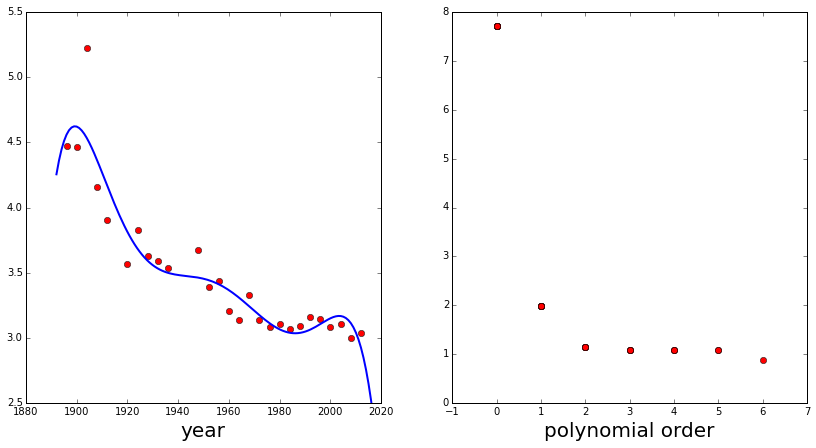

In [11]:
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
f, ax = plt.subplots(1, 2, figsize=(14,7))
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
max_basis = 7

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis+1):
    
    model= mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective() 
    ll[num_basis-1] = model.log_likelihood()
    mlai.plot_marathon_fit(model=model, data_limits=data_limits, 
                           objective=sum_squares, objective_ylim=[0,8],
                           fig=f, ax=ax)


![](./diagrams/olympic_polynomial1.svg) 

![](./diagrams/olympic_polynomial2.svg) 

![](./diagrams/olympic_polynomial3.svg) 

![](./diagrams/olympic_polynomial4.svg) 

![](./diagrams/olympic_polynomial5.svg) 

![](./diagrams/olympic_polynomial6.svg) 

![](./diagrams/olympic_polynomial7.svg) 

#### Reading

- Section 1.4 of @Rogers:book11.
- Chapter 1, pg 1-6 of @Bishop:book06.
- Chapter 3, Section 3.1 of @Bishop:book06 up to pg 143.

 